In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
json_path = '/content/drive/MyDrive/Colab_Notebooks/instances_val2017.json/instances_val2017.json'
images_dir = '/content/drive/MyDrive/Colab_Notebooks/val2017'

In [45]:
import os
import math
import random
import json
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
import matplotlib.patches as patches
import sklearn.metrics as met
from PIL import Image, ImageEnhance, ImageDraw
from skimage import color, draw
from skimage.transform import resize
from skimage.segmentation import active_contour

In [46]:
def load_coco_annotations(json_path):
  with open(json_path, "r") as f:
    data = json.load(f)
  return data

In [47]:
# Display image with bounding boxes
def display_image_with_bboxes(image_path, annotations):
    # Load the image
    image = Image.open(image_path)
    image = process_image(image)  # Apply processing functions

    # Convert image to array for matplotlib
    image_np = np.array(image)

    # Create a figure and axis for displaying the image
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image_np)

    # Draw bounding boxes for each annotation
    for anno in annotations:
        bbox = anno['bbox']  # Format: [x, y, width, height]

        # Create a rectangle patch
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2, edgecolor='red', facecolor='none'
        )

        # Add the rectangle to the plot
        ax.add_patch(rect)

    plt.axis("off")
    plt.show()

In [48]:
# Image processing function
def process_image(image):
    # Resize image
    image = image.resize((300, 300))

    # Adjust brightness
    enhancer = ImageEnhance.Brightness(image)
    image_bright = enhancer.enhance(1.2)  # Increase brightness by 20%

    return image_bright

In [49]:
# Load the annotations file from COCO
coco_annotations = load_coco_annotations(json_path)

In [71]:
# Get all available image IDs
all_image_ids = [img['id'] for img in coco_annotations['images']]

In [75]:
# Select 3 random image IDs
num_images_to_display = 2
selected_image_ids = np.random.choice(all_image_ids, num_images_to_display, replace=False)

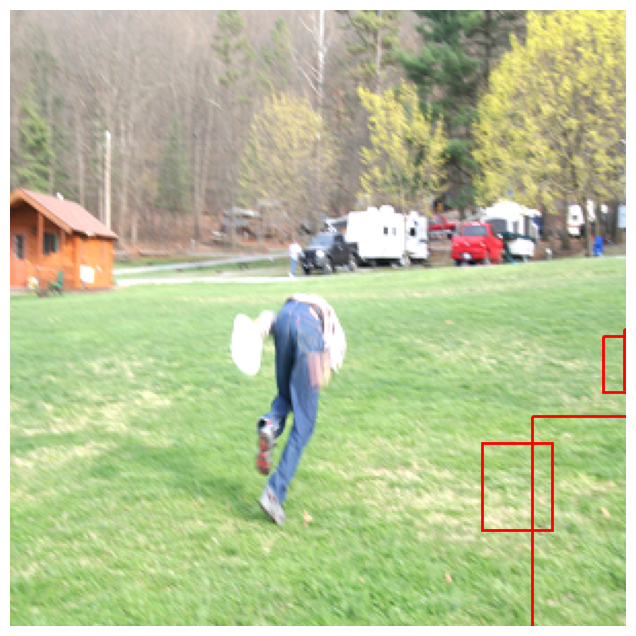

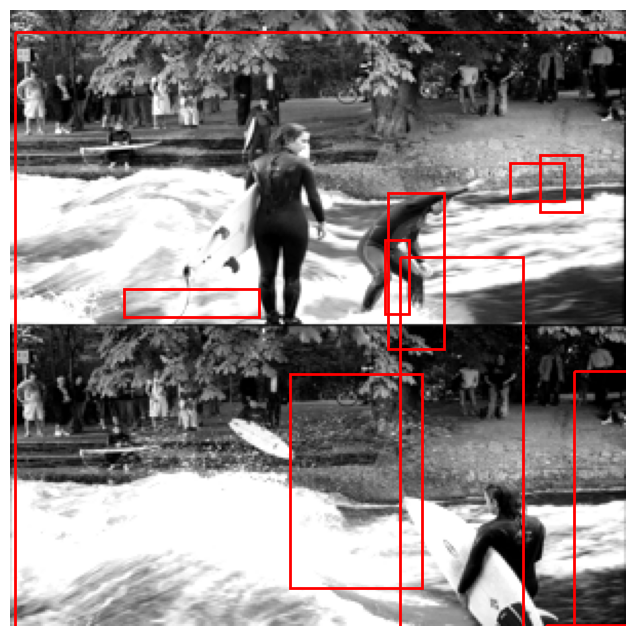

In [76]:
# Loop through selected image IDs to display each one
for image_id in selected_image_ids:
    # Retrieve image information
    image_info = next(img for img in coco_annotations['images'] if img['id'] == image_id)
    image_path = os.path.join(images_dir, image_info['file_name'])

    # Retrieve annotations for the current image
    annotations = [anno for anno in coco_annotations['annotations'] if anno['image_id'] == image_id]

    # Display image with annotations
    display_image_with_bboxes(image_path, annotations)